In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD
from keras.regularizers import l2

from keras.applications.xception import Xception

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf

import cv2
import os

import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
print('alright')

alright


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [28]:
from keras.applications.mobilenet import MobileNet
model = MobileNet(weights=None, include_top=True, classes = 10)
model.summary()


Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [10]:
labels = ['Chapman', 'Cockcroft', 'Library', 'Maxwell', 'Media_City_Campus', 'New_Adelphi', 'New_Science', 'Newton', 'Sports_Center', 'University_House']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)


train = get_data("C:/Users/jibra/pieas/icv/uos/dataset")
print('here')


# =============================================================================
train1, val = train_test_split(train, test_size=0.2, random_state=25)
# print(train1.shape)
# print(val.shape)
# # 
# =============================================================================


KeyboardInterrupt: 

Text(0.5, 1.0, 'University_House')

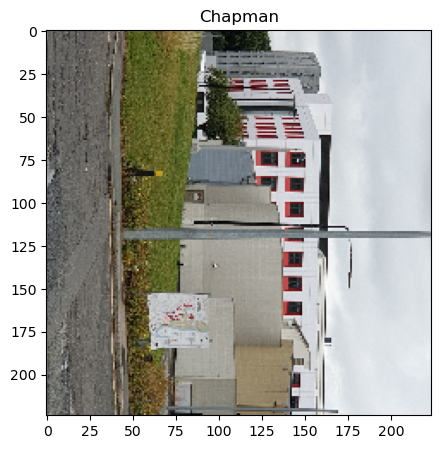

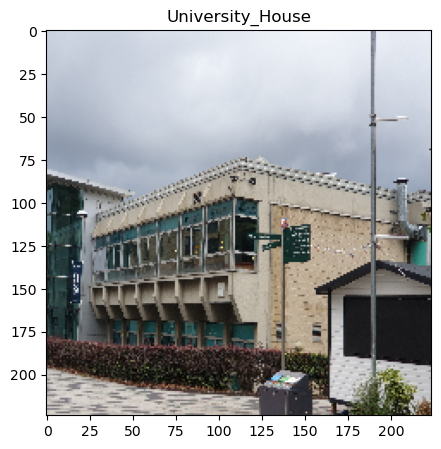

In [12]:
plt.figure(figsize = (5,5))
plt.imshow(train[3][0])
# print(train[0][1])
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [13]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train1:
  x_train.append(feature)
  y_train.append(label)

# =============================================================================
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)
# 
# =============================================================================
# print(x_train.shape)
# print(x_val.shape)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)
datagen.fit(x_val)

In [29]:

opt = Adam(lr=0.001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])


In [32]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)

In [ ]:
history = model.fit(x_train,y_train,epochs = 50, validation_data=(x_val, y_val),  batch_size = 32, callbacks = [early_stop])



Epoch 1/50
19/19 [==============================] - 39s 2s/step - loss: 2.0610 - accuracy: 0.2533 - val_loss: 2.3842 - val_accuracy: 0.0927
Epoch 2/50
19/19 [==============================] - 34s 2s/step - loss: 1.7996 - accuracy: 0.3667 - val_loss: 2.5558 - val_accuracy: 0.0596
Epoch 3/50
19/19 [==============================] - 32s 2s/step - loss: 1.5141 - accuracy: 0.4817 - val_loss: 2.7693 - val_accuracy: 0.0596
Epoch 4/50
19/19 [==============================] - 32s 2s/step - loss: 1.1256 - accuracy: 0.5900 - val_loss: 3.0704 - val_accuracy: 0.0596
Epoch 5/50


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

predictions = model.predict(x_train)

print(predictions)

score = model.evaluate(x_val, y_val)
print(score)